<a href="https://colab.research.google.com/github/Punyaraj7/AI/blob/main/Regression_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Use case: Build an ANN model that predicts the Power Energy for Powerplant based data. Independent features: sensor readings related to powerplant machines

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
import pandas as pd
df = pd.read_csv(r'https://raw.githubusercontent.com/sindhura-nk/Datasets/refs/heads/main/PowerPlant.csv')
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


  AT: Atmospheric Temperature
  V: Vaccum
  AP: Atmospheric Pressure
  RH: Relative Humidity
  PE: Power Energy

### Perform basic data quality checks

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [5]:
df.isna().sum()

,0
AT,0
V,0
AP,0
RH,0
PE,0


In [6]:
df.duplicated().sum()

np.int64(41)

In [7]:
df=df.drop_duplicates()

## Separate data into X and Y features

In [8]:
X = df.drop(columns=['PE'])
Y = df[["PE"]]

In [9]:
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [10]:
Y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


## Data Preprocessing and Data cleaning

In [11]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [12]:
num_pipe = make_pipeline(SimpleImputer(strategy='mean'),StandardScaler()).set_output(transform='pandas')

In [13]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [14]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,AT,V,AP,RH
0,-1.520448,-1.066041,-0.403535,1.141599
1,0.534897,0.330813,-0.309262,0.059223
2,1.354348,0.205475,-1.024725,-2.151400
3,-0.079020,-0.362884,-1.012941,0.236538
4,-1.055645,-1.074713,0.655349,1.633837


## Train test split

In [15]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,train_size=0.85,random_state=21)

In [16]:
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(8097, 4) (1430, 4) (8097, 1) (1430, 1)


## Artificial Neural Network Model Building

In [17]:
from keras.models import Sequential
from keras.layers import Input,Dense


In [18]:
xtrain.shape

(8097, 4)

In [19]:
xtrain.shape[1]

4

In [20]:
model = Sequential()

# Add the Input layer
model.add(Input(shape=(xtrain.shape[1],)))

# Add the Hidden layers1
model.add(Dense(units=8,activation='relu'))

# Add the Hidden layer2
model.add(Dense(units=4,activation='relu'))

# Add the output layer
model.add(Dense(units=1,activation='linear'))

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81 (324.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae'])

In [23]:
nn = model.fit(xtrain,ytrain,validation_split=0.2,epochs=40)

Epoch 1/40
203/203 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 205769.5938 - mae: 453.3217 - val_loss: 203603.0781 - val_mae: 450.9844
Epoch 2/40
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 201103.0781 - mae: 448.2229 - val_loss: 192923.6562 - val_mae: 439.0815
Epoch 3/40
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 187557.9219 - mae: 432.8937 - val_loss: 168638.3438 - val_mae: 410.3508
Epoch 4/40
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 160291.3125 - mae: 399.6947 - val_loss: 130408.4531 - val_mae: 359.0255
Epoch 5/40
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 120135.7188 - mae: 343.0632 - val_loss: 87454.0469 - val_mae: 286.6185
Epoch 6/40
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 79981.8359 - mae: 271.0766 - val_loss: 53744.7070 - val_mae: 213.1537
Epoch 7/40
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 49190.8164 - mae: 203.6871 - val_loss: 32385.0293 - val_mae: 160.4089
Epoch 8/40
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29845.2832 - mae: 154

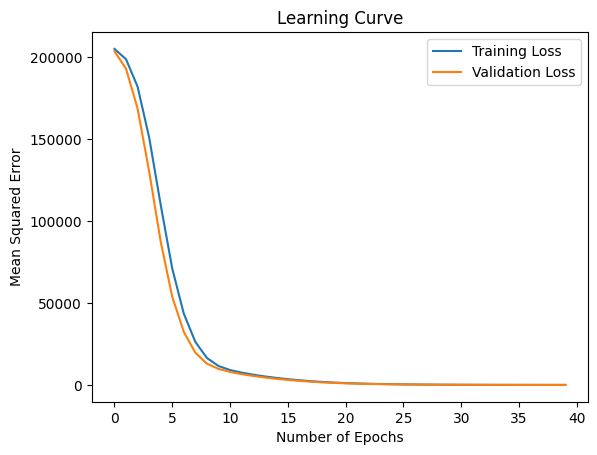

In [24]:
## Plot the learning curve
import matplotlib.pyplot as plt
plt.plot(nn.history['loss'],label='Training Loss')
plt.plot(nn.history['val_loss'],label='Validation Loss')
plt.xlabel("Number of Epochs")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Learning Curve")
plt.show()

# Evaluate the model

In [25]:
model.evaluate(xtrain,ytrain)

254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 30.1145 - mae: 4.1951


[30.1058292388916, 4.184942722320557]

In [26]:
model.evaluate(xtest,ytest)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29.9013 - mae: 4.1629


[29.994739532470703, 4.223659515380859]

In [27]:
ypred_test = model.predict(xtest)


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [28]:
ypred_train = model.predict(xtrain)

254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [29]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mse1 = mean_squared_error(ytrain,ypred_train)
mae1 = mean_absolute_error(ytrain,ypred_train)
r21 = r2_score(ytrain,ypred_train)

print(f"Mean Squared Error:{mse1}")
print(f"Mean Absolute Error:{mae1}")
print(f"R2 Score:{r21}")

Mean Squared Error:30.105810165405273
Mean Absolute Error:4.184943199157715
R2 Score:0.8959388136863708


In [31]:
mse = mean_squared_error(ytest,ypred_test)
mae = mean_absolute_error(ytest,ypred_test)
r2 = r2_score(ytest,ypred_test)
print(f"Mean Squared Error:{mse}")
print(f"Mean Absolute Error:{mae}")
print(f"R2 Score:{r2}")


Mean Squared Error:29.994739532470703
Mean Absolute Error:4.223659992218018
R2 Score:0.8985892534255981


# Save the model

In [32]:
model.save('PEPredictions.keras')

# Load the model

In [33]:
from keras.models import load_model
m = load_model('/content/PEPredictions.keras')
m.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 245 (984.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 164 (660.00 B)

# Generate out of sample predictions

In [34]:

xnew = pd.read_csv(r'https://raw.githubusercontent.com/sindhura-nk/Datasets/refs/heads/main/PowerPlantTest.csv')
xnew

,AT,V,AP,RH
0,25,51.5,1000.1,57.0
1,32,41.0,1051.1,80.0
2,28,NaN,1010.2,NaN


In [35]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre.head()

,AT,V,AP,RH
0,0.717594,-0.220203,-2.211551,-1.118316
1,1.657948,-1.047911,6.373998,0.456299
2,1.120603,0.000000,-0.511275,0.000000


In [36]:

PE_preds = m.predict(xnew_pre)
PE_preds


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


array([[443.55197],
       [475.14908],
       [438.87494]], dtype=float32)

In [37]:
xnew

,AT,V,AP,RH
0,25,51.5,1000.1,57.0
1,32,41.0,1051.1,80.0
2,28,NaN,1010.2,NaN


In [38]:
xnew["PE predictions"] = PE_preds.round()

In [39]:

xnew

,AT,V,AP,RH,PE predictions
0,25,51.5,1000.1,57.0,444.0
1,32,41.0,1051.1,80.0,475.0
2,28,NaN,1010.2,NaN,439.0


In [40]:

xnew['PE predictions'] = xnew['PE predictions'].astype(int).round(2)

In [41]:

xnew

,AT,V,AP,RH,PE predictions
0,25,51.5,1000.1,57.0,444
1,32,41.0,1051.1,80.0,475
2,28,NaN,1010.2,NaN,439


In [42]:
xnew.to_csv("Prediction_Results_updated.csv",index=False)